
Templates loaded from C:/Users/Ahmme/Downloads/json/cut_train.JSON
hervest


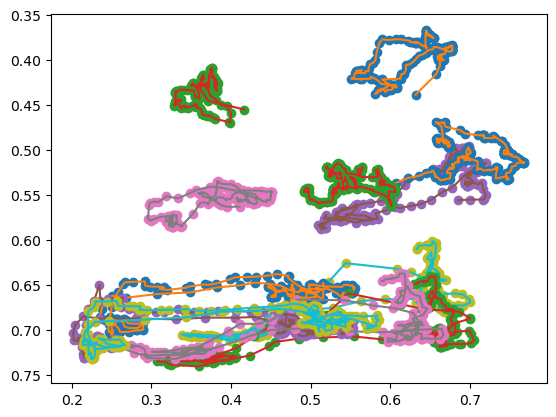

(None, 0)
0.031249523162841797
hervest


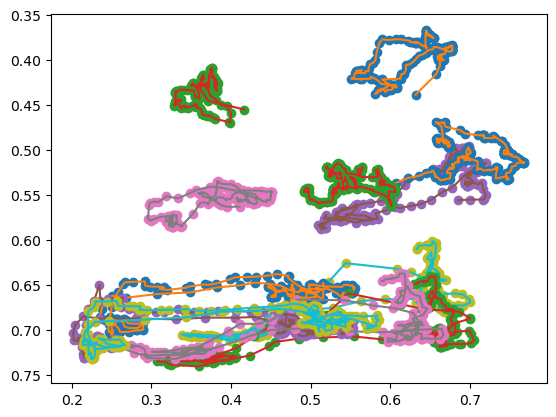

('watering_train', 0.021810102075685456)
0.020959138870239258
hervest


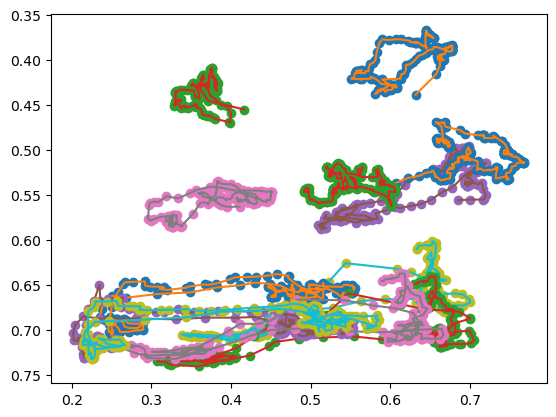

('hervest', 1.0)
0.054785966873168945


In [1]:
import cv2
import mediapipe
import socket
import threading
import json
import pickle,imutils,struct
import mediapipe as mp # Import mediapipe
import cv2 # Import opencv
from dollarpy import Recognizer, Template, Point
import os
import numpy as np
import matplotlib.pyplot as plt
import json
import time

vid = 'C:/Users/Ahmme/Downloads/pexels-greta-hoffman-7714903 (Original) (1).mp4'

def load_templates_from_json(filename):
    try:
        with open(filename, 'r') as json_file:
            template_data = json.load(json_file)
            templates = []
            for entry in template_data:
                for point in entry['point']:
                    x, y, stroke_id = point
                    point_object = Point(x, y, stroke_id)
                    templates.append(point_object)
            return templates
    except FileNotFoundError:
        print(f"File '{filename}' not found.")
        return []


#TEST
def test(tmpl,y):
    points = getPoints(vid,"hervest")
    start = time.time()
    tmpl_2 = Template(y, tmpl)
    templates.append(tmpl_2)
    recognizer = Recognizer(templates)
    results = recognizer.recognize(points)
    end = time.time()
    duration=end-start
    print(results)
    print(duration)
    #if(results[0]=="cut"):
        #print('open')
        #sockett()
        
        
    
mp_drawing = mp.solutions.drawing_utils # Drawing helpers
mp_holistic = mp.solutions.holistic # Mediapipe Solutions
templates=[] #list of templates for $1 training
def getPoints(videoURL,label):
    cap = cv2.VideoCapture(videoURL)#web cam =0 , else enter filename
    # Initiate holistic model
    with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
        #List to hold Coordinates
        points = []
        left_shoulder=[]
        right_shoulder=[]
        left_elbos=[]
        right_elbos=[]
        left_wirst=[]
        right_wrist=[]
        left_pinky=[]
        right_pinky=[]
        left_index=[]
        right_index=[]
        left_hip=[]
        right_hip=[]

        #List to Plot
        m_left_shoulder=[]
        m_right_shoulder=[]
        m_left_elbos=[]
        m_right_elbos=[]
        m_left_wirst=[]
        m_right_wrist=[]
        m_left_pinky=[]
        m_right_pinky=[]
        m_left_index=[]
        m_right_index=[]
        m_left_hip=[]
        m_right_hip=[]

        while cap.isOpened():
            ret, frame = cap.read()

            # Recolor Feed
            if ret==True:
                image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                image.flags.writeable = False

                # Make Detections
                results = holistic.process(image)
                
                # Recolor image back to BGR for rendering
                image.flags.writeable = True
                image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)


                # 2. Right hand
                mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                                         mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                                         mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                                         )

                # 3. Left Hand
                mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                                         mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                                         mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                                         )

                # 4. Pose Detections
                mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                                         mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                         mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                         )
                # Export coordinates
                try:
                    # Extract Pose landmarks
                    pose = results.pose_landmarks.landmark
                    index = 0
                    newlist=[]
                    for lnd in pose:
                        if(index  in [11,12,13,14,15,16,17,18,19,20,23,24]):
                            newlist.append(lnd)
                        index+=1



                    # add points of wrist , elbow and shoulder
                    left_shoulder.append(Point(newlist[0].x,newlist[0].y,1))
                    right_shoulder.append(Point(newlist[1].x,newlist[1].y,2))
                    left_elbos.append(Point(newlist[2].x,newlist[2].y,3))
                    right_elbos.append(Point(newlist[3].x,newlist[3].y,4))
                    left_wirst.append(Point(newlist[4].x,newlist[4].y,5))
                    right_wrist.append(Point(newlist[5].x,newlist[5].y,6))
                    left_pinky.append(Point(newlist[6].x,newlist[6].y,7))
                    right_pinky.append(Point(newlist[7].x,newlist[7].y,8))
                    left_index.append(Point(newlist[8].x,newlist[8].y,9))
                    right_index.append(Point(newlist[9].x,newlist[9].y,10))
                    left_hip.append(Point(newlist[10].x,newlist[10].y,11))
                    right_hip.append(Point(newlist[11].x,newlist[11].y,12))

                    m_left_shoulder.append((newlist[0].x,newlist[0].y))
                    m_right_shoulder.append((newlist[1].x,newlist[1].y))
                    m_left_elbos.append((newlist[2].x,newlist[2].y))
                    m_right_elbos.append((newlist[3].x,newlist[3].y))
                    m_left_wirst.append((newlist[4].x,newlist[4].y))
                    m_right_wrist.append((newlist[5].x,newlist[5].y))
                    m_left_pinky.append((newlist[6].x,newlist[6].y))
                    m_right_pinky.append((newlist[7].x,newlist[7].y))
                    m_left_index.append((newlist[8].x,newlist[8].y))
                    m_right_index.append((newlist[9].x,newlist[9].y))
                    m_left_hip.append((newlist[10].x,newlist[10].y))
                    m_right_hip.append((newlist[11].x,newlist[11].y))
                   




                except:
                    pass
                #cv2_imshow(image)

            if  ret==False:
                break

    cap.release()
    cv2.destroyAllWindows()
    points = left_shoulder+right_shoulder+left_elbos+right_elbos+left_wirst+right_wrist+left_pinky+right_pinky+left_index+right_index+left_hip+right_hip
    print(label)
    xs, ys = zip(*m_left_shoulder)
    plt.plot(xs, ys, 'o')
    plt.plot(xs, ys, '-')
    xs, ys = zip(*m_right_shoulder)
    plt.plot(xs, ys, 'o')
    plt.plot(xs, ys, '-')
    xs, ys = zip(*m_left_elbos)
    plt.plot(xs, ys, 'o')
    plt.plot(xs, ys, '-')

    xs, ys = zip(*m_right_elbos)
    plt.plot(xs, ys, 'o')
    plt.plot(xs, ys, '-')
    xs, ys = zip(*m_left_wirst)
    plt.plot(xs, ys, 'o')
    plt.plot(xs, ys, '-')
    xs, ys = zip(*m_right_wrist)
    plt.plot(xs, ys, 'o')
    plt.plot(xs, ys, '-')


    xs, ys = zip(*m_left_pinky)
    plt.plot(xs, ys, 'o')
    plt.plot(xs, ys, '-')
    xs, ys = zip(*m_right_pinky)
    plt.plot(xs, ys, 'o')
    plt.plot(xs, ys, '-')
    xs, ys = zip(*m_left_index)
    plt.plot(xs, ys, 'o')
    plt.plot(xs, ys, '-')


    xs, ys = zip(*m_right_index)
    plt.plot(xs, ys, 'o')
    plt.plot(xs, ys, '-')
    xs, ys = zip(*m_left_hip)
    plt.plot(xs, ys, 'o')
    plt.plot(xs, ys, '-')
    xs, ys = zip(*m_right_hip)
    plt.plot(xs, ys, 'o')
    plt.plot(xs, ys, '-')


    plt.gca().invert_yaxis()


    plt.show()
    return points


def mp(client_socket): 
    
    capture = cv2.VideoCapture(vid)
    
    while(capture.isOpened()):
     
        ret, frame = capture.read()
        frame = imutils.resize(frame, width=320)
        a = pickle.dumps(frame)
        message = struct.pack("Q",len(a))+a
        client_socket.sendall(message) 
        key = cv2.waitKey(1) & 0xFF
        if key ==ord('q'):
            client_socket.close()
        
    #cv2.imshow('Test hand', frame) 
    cv2.destroyAllWindows()
    capture.release()
    

def ssocket():
    mySocket = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
    mySocket.bind(('localhost', 5000))
    mySocket.listen(5)
    print("Server is listening ")
    while True:
        client_socket, addr = mySocket.accept()
        print(f"Connection from {addr[0]}:{addr[1]}")
        
        global run_extraction  # Use the global flag
        
        # Set the flag to True when the connection is open
        run_extraction = True

        # Start the hand thread after the client connects
        hand_thread = threading.Thread(target=mp, args=(client_socket,))
        hand_thread.start()

        # Wait for the hand_thread to finish (connection terminated)
        hand_thread.join()

        # Reset the flag to False when the connection is terminated
        run_extraction = False

def sockett():
    # Create and start the socket thread
    socket_thread = threading.Thread(target=ssocket,)
    socket_thread.start()
    socket_thread.join()
        
json_filename = "C:/Users/Ahmme/Downloads/json/collcet_train.JSON"
tmpl_1 = load_templates_from_json(json_filename)
json_filename = "C:/Users/Ahmme/Downloads/json/watering_train.JSON"
tmpl_2 = load_templates_from_json(json_filename)
json_filename = "C:/Users/Ahmme/Downloads/json/hervest_train.JSON"
tmpl_3 = load_templates_from_json(json_filename)
json_filename = "C:/Users/Ahmme/Downloads/json/cut_train.JSON"
tmpl_4 = load_templates_from_json(json_filename)

# Now, tmpl_2 contains the templates loaded from the JSON file
print(f'Templates loaded from {json_filename}')
test(tmpl_1,'collcet')
test(tmpl_2,'watering_train')
#test(tmpl_4,'cut')
test(tmpl_3,'hervest')